# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [58]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [59]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [60]:
cursor = con.cursor()
cursor.execute("SELECT MAX(hire_date), MIN(hire_date) FROM employees")
result = cursor.fetchall()
print(result)

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]


Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП. 

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [12]:
import pandas as pd

In [75]:
cursor = con.cursor()
sql = """
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM salaries s
JOIN (
    SELECT emp_no, MAX(to_date) as max_date
    FROM salaries
    GROUP BY emp_no
) max_dates
ON s.emp_no = max_dates.emp_no AND s.to_date = max_dates.max_date
"""
cursor.execute(sql)
field_names = [i[0] for i in cursor.description]
data = cursor.fetchall()
res = pd.DataFrame(data, columns=field_names)
res

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
300175,499995,52868,2002-06-01,9999-01-01
300176,499996,69501,2002-05-12,9999-01-01
300177,499997,83441,2001-08-26,9999-01-01
300178,499998,55003,2001-12-25,9999-01-01


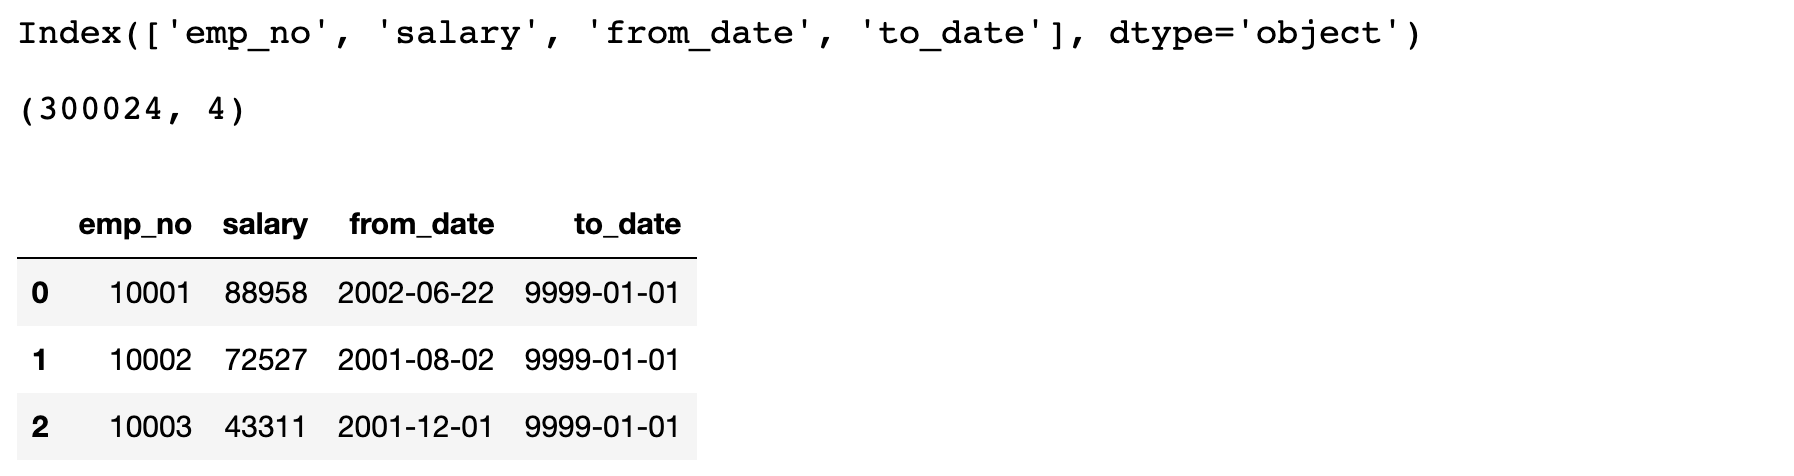

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [63]:
from datetime import date
to_date_dtype = res['to_date'].dtype
print("date type of to_date is:", to_date_dtype)
to_date_9999 = date.fromisoformat('9999-01-01')
count_to_date_9999 = len(res[res['to_date'] == to_date_9999])
count_other_to_date = len(res[res['to_date'] != to_date_9999])
print("quantity of 9999-01-01 value':", count_to_date_9999)
print("other:", count_other_to_date)

date type of to_date is: object
quantity of 9999-01-01 value': 240124
other: 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

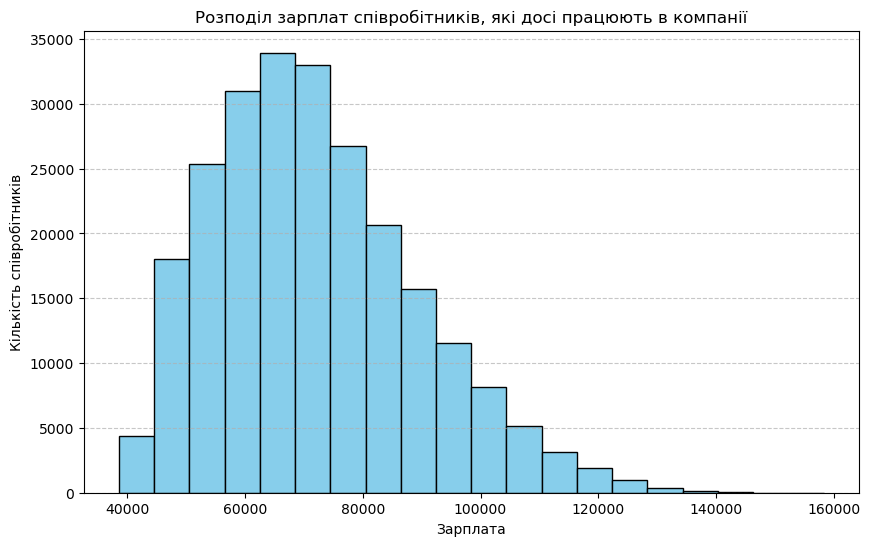

In [38]:
import matplotlib.pyplot as plt
still_working = res[res['to_date'] == to_date_9999]
plt.figure(figsize=(10, 6))
plt.hist(still_working['salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл зарплат співробітників, які досі працюють в компанії')
plt.xlabel('Зарплата')
plt.ylabel('Кількість співробітників')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

7.Виведіть кількість співробітників за роком, в який вони були найняті (`hire_date`) використовуючи `pandas.read_sql`. Запишіть результат в змінну `df` та виведіть значення змінної на екран.

In [64]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS emp_num
FROM employees
GROUP BY hire_year
"""
df = pd.read_sql_query(sql, con)
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12520\1808567180.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, con)


,hire_year,emp_num
0,1986,36150
1,1985,35316
2,1989,28394
3,1994,14835
4,1990,25610
5,1992,20402
6,1987,33501
7,1995,12115
8,1993,17772
9,1999,1514


Очікуваний результат:

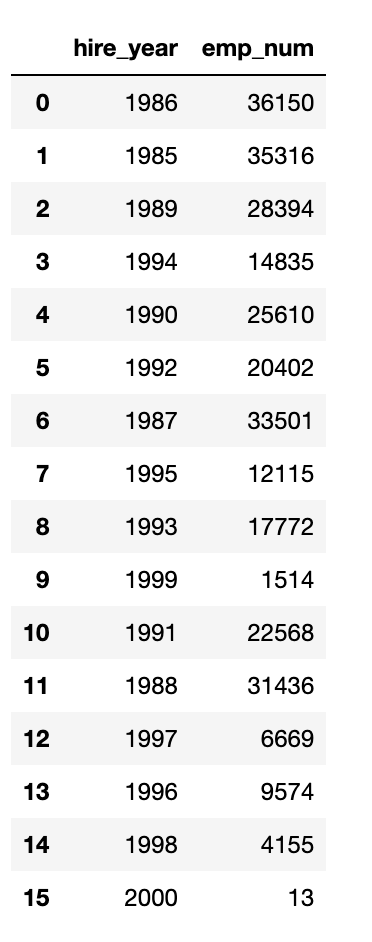

8.Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

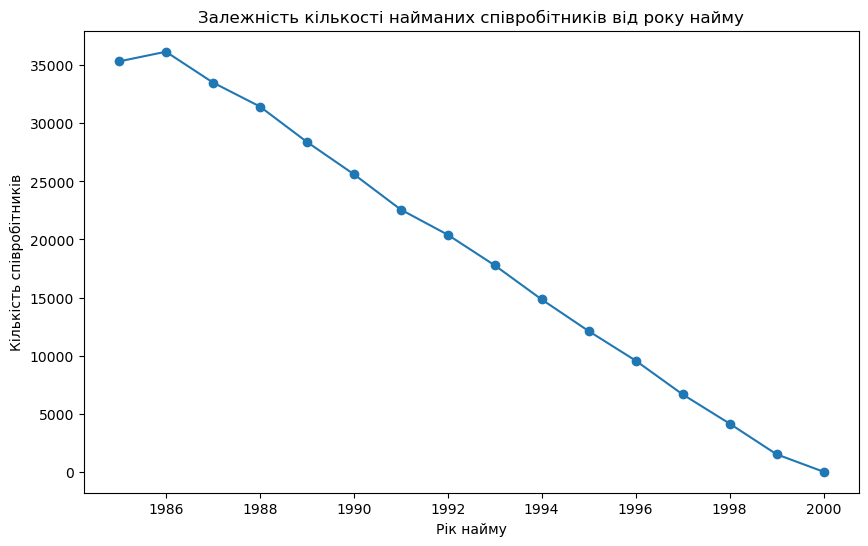

In [45]:
df_sorted = df.sort_values(by='hire_year')
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['hire_year'], df_sorted['emp_num'], marker='o')
plt.title('Залежність кількості найманих співробітників від року найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість співробітників')
plt.show()

Очікуваний результат:

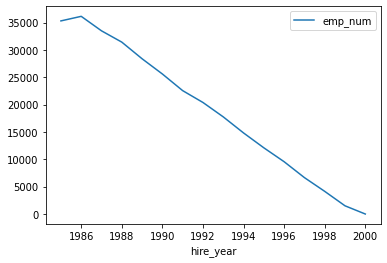

9.З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [67]:
sql = """
SELECT
    t.emp_no,
    t.title,
    TIMESTAMPDIFF(YEAR, t.from_date, t.to_date) AS duration,
    t.from_date,
    t.to_date
FROM
    titles t
JOIN
    employees e ON t.emp_no = e.emp_no
WHERE
    t.title = 'Engineer'
    AND t.to_date IS NOT NULL AND t.to_date != '9999-01-01';
"""
df_years = pd.read_sql_query(sql, con)
df_years 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12520\2727076913.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql_query(sql, con)


,emp_no,title,duration,from_date,to_date
0,10004,Engineer,9,1986-12-01,1995-12-01
1,10009,Engineer,5,1990-02-18,1995-02-18
2,10012,Engineer,8,1992-12-18,2000-12-18
3,10018,Engineer,8,1987-04-03,1995-04-03
4,10026,Engineer,5,1995-03-20,2001-03-19
...,...,...,...,...,...
84015,499972,Engineer,9,1989-11-23,1998-11-23
84016,499984,Engineer,5,1989-07-30,1994-07-30
84017,499994,Engineer,0,1993-02-22,1993-10-27
84018,499996,Engineer,6,1996-05-13,2002-05-13


Очікуваний результат:

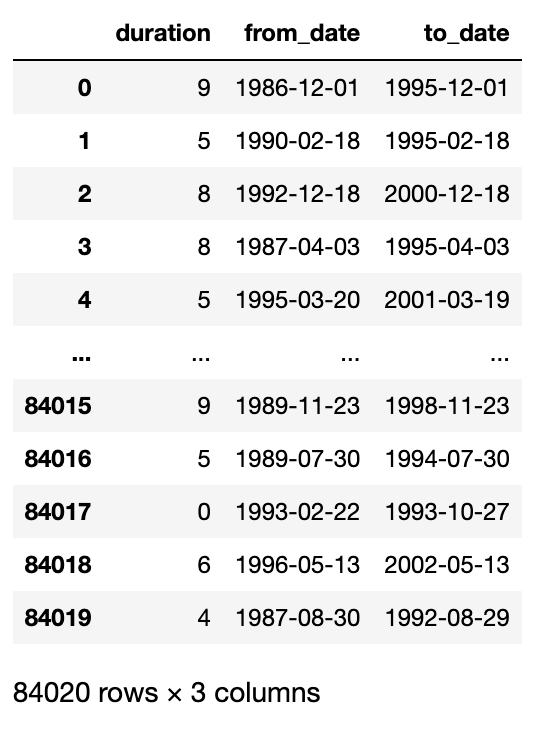

10.Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

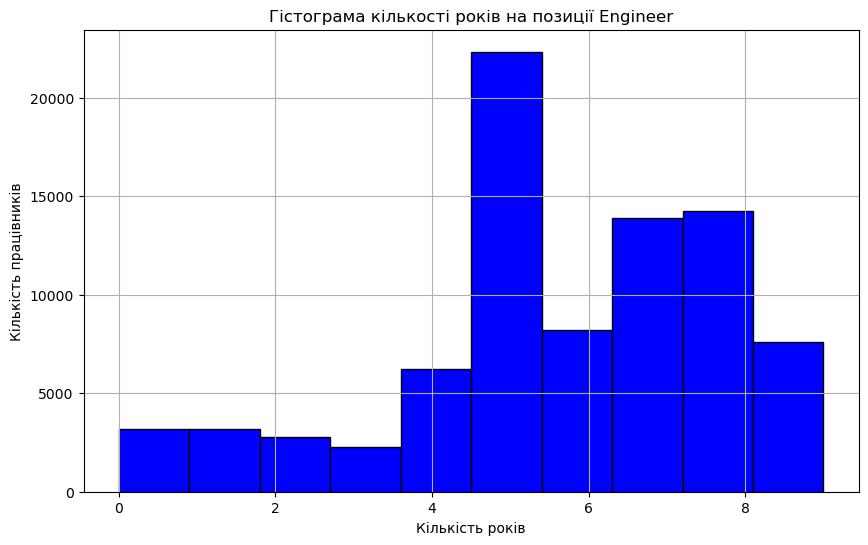

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df_years['duration'], bins=10, color='blue', edgecolor='black')
plt.title('Гістограма кількості років на позиції Engineer')
plt.xlabel('Кількість років')
plt.ylabel('Кількість працівників')
plt.grid(True)
plt.show()

Очікуваний результат:

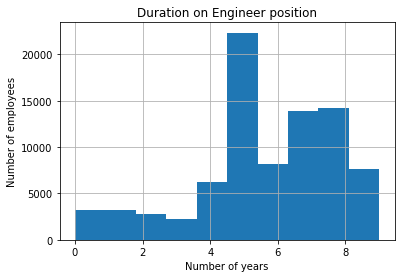

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [5]:
con.close()